In [116]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [117]:
df = pd.read_csv('../Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [118]:
# Drop the useless columns.
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**we observed TotalCharges is object**

In [119]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [174]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [121]:
# The error is occurring due to the presence of null values that cannot be converted to floats.
# So we need to find that nulls values and remove them if their quantity is insignificant.
print('Number of rows in our dataset',df.shape[0],'\n')
print('Number of rows of null values in our dataset',df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape[0],'\n')
print('Dropping the null values should not pose a significant issue')

Number of rows in our dataset 7043 

Number of rows of null values in our dataset 11 

Dropping the null values should not pose a significant issue


In [122]:
# Lets find that 11 rows with empty values in TotalCharges column
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [123]:
df.iloc[488]['TotalCharges'], df.iloc[753]['TotalCharges'], df.iloc[1082]['TotalCharges']

(' ', ' ', ' ')

In [124]:
# So we delete all the ' ' from TotalCharges
new_df = df[df.TotalCharges!=' ']
print(df.shape)
new_df.shape

(7043, 20)


(7032, 20)

In [125]:
# We drop the nulls so we can convert it now to numeric
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)
new_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [126]:
# Let's show the customers who are still with the company and haven't left.
new_df[new_df.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [127]:
# Let's see how long is that customers in company
new_df[new_df.Churn == 'No'].tenure 

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

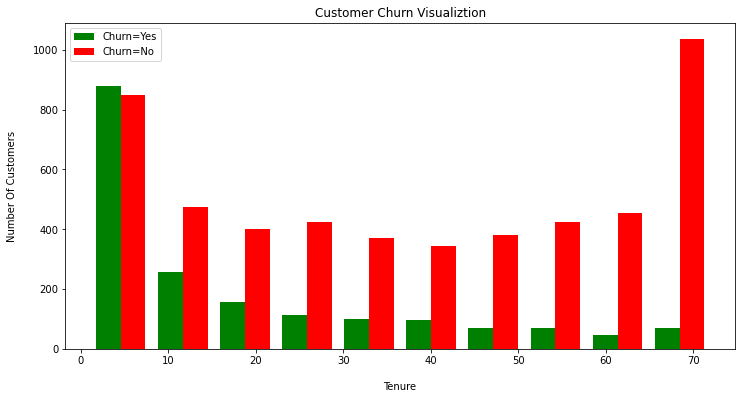

In [128]:
# We will create a plot showing the customers who have left the company and those who have stayed, along with 
# the duration of their time with the company.
tenure_churn_no = new_df[new_df.Churn == 'No'].tenure
tenure_churn_yes = new_df[new_df.Churn == 'Yes'].tenure

plt.figure(figsize=(12,6))

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.xlabel("\nTenure")
plt.ylabel("Number Of Customers\n")
plt.title("Customer Churn Visualiztion")

plt.legend()
plt.show()

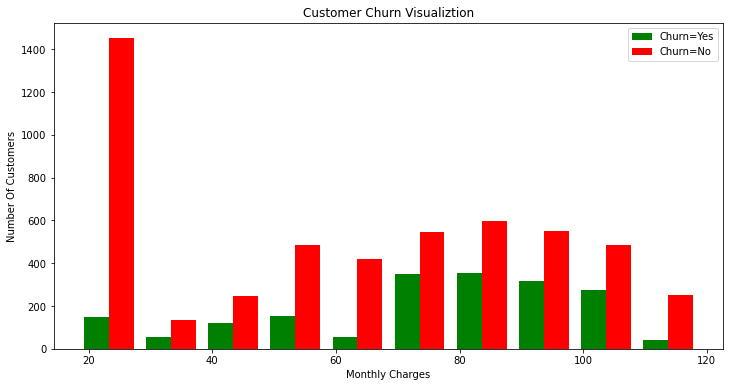

In [129]:
# Let's plot and the MonthlyCharges
monthly_churn_no = new_df[new_df.Churn=='No'].MonthlyCharges      
monthly_churn_yes = new_df[new_df.Churn=='Yes'].MonthlyCharges  

plt.figure(figsize=(12,6))

plt.hist([monthly_churn_yes, monthly_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualiztion")

plt.legend()
plt.show()

**Preprocessing**

In [130]:
for column in new_df:
    if new_df[column].dtypes=='object':
        print(f'{column}: {new_df[column].unique()}') 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [131]:
# Replace the Female and Male with 1 and 0
new_df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [132]:
# we notice the category No Internet Serbian we can rank it at category No
new_df.replace('No internet service', 'No', inplace=True)
new_df.replace('No phone service', 'No', inplace=True)

In [133]:
# Scaling in 0 and 1 the booleans columns Yes_No
columns_with_Yes_No = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                       'StreamingTV','StreamingMovies','PaperlessBilling','Churn'] 

for columns in columns_with_Yes_No:
    new_df[columns].replace({'Yes': 1, 'No': 0}, inplace=True)

In [134]:
for column in new_df:
    print(f'{column}: {new_df[column].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [135]:
# We applied One Hot Encoding to scale the remaining columns
new_df = pd.get_dummies(data=new_df, columns=['InternetService','Contract','PaymentMethod'])
new_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [136]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [137]:
# So we need to scaling and the numeric columns
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

 #----------------------
# Scaled in 0 and 1 with MinMaxScaler.
#----------------------

scaler = MinMaxScaler()

new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])
new_df[columns_to_scale].head(15)

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
5,0.098592,0.809950,0.092511
6,0.295775,0.704975,0.222779
7,0.126761,0.114428,0.032668
8,0.380282,0.861194,0.349325
9,0.859155,0.377114,0.400317


In [138]:
for col in new_df:
    print(f'{col}: {new_df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train and Test Split**

In [139]:
X = new_df.drop('Churn', axis='columns')
y = new_df['Churn']
X.to_numpy().astype('float')

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(f'The split of data is this\n\nFor the train data:\n  X_train {X_train.shape}\n  y_train is {y_train.shape}\n\n'+
      f'For the test data:\n  X_test {X_test.shape}\n  y_test is {y_test.shape}')

The split of data is this

For the train data:
  X_train (5625, 26)
  y_train is (5625,)

For the test data:
  X_test (1407, 26)
  y_test is (1407,)


In [141]:
# Create a function to create an Artificial Neural Network (ANN), make the predictions of that and evaluate it.
def ANN(X_train, y_train, X_test, y_test, loss):

    # Define the architecture of the neural network model
    model = keras.Sequential([
        keras.layers.Dense(64, input_shape=(26,), activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid') 
    ])

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])

    # Train the model using the provided training data
    model.fit(X_train, y_train, validation_split=0.2, epochs=100)  # 20% of the training data used for validation

    # Make predictions on the test data
    y_preds = model.predict(X_test)

    # Evaluate the model's performance on the test data
    print('\n\nTest Loss of Model is ',  model.evaluate(X_test, y_test)[0] ,'  |  Test Accuracy is ', model.evaluate(X_test, y_test)[1],'\n')

    # Return the predicted values for further analysis or use
    return y_preds

In [142]:
Y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
141/141 [==============================] - 2s 6ms/step - loss: 0.5220 - accuracy: 0.7389 - val_loss: 0.4520 - val_accuracy: 0.7769
Epoch 2/100
141/141 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.7860 - val_loss: 0.4394 - val_accuracy: 0.7831
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7884 - val_loss: 0.4371 - val_accuracy: 0.7849
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7998 - val_loss: 0.4357 - val_accuracy: 0.7893
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7944 - val_loss: 0.4350 - val_accuracy: 0.7911
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4198 - accuracy: 0.8051 - val_loss: 0.4339 - val_accuracy: 0.7929
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8118 - val_loss: 0.4355 - val_accuracy: 0.7929

In [143]:
# We need to convert that Y_pred to a 0 and 1 values
print('Y_Pred for Model:\n',Y_preds[:10])

Y_Pred for Model:
 [[0.12740617]
 [0.37615505]
 [0.00378179]
 [0.7067211 ]
 [0.6676496 ]
 [0.82234937]
 [0.00809121]
 [0.51498497]
 [0.28199372]
 [0.05413261]]


In [144]:
def binary_prediction_comparison(Y_preds, y_test):
    # Create a binary list, y_pred, to determine whether customers churn or not based on predicted probabilities.
    # For each element in Y_pred, we use an if-else statement to check if it is greater than 0.5.
    # If the condition is true we append 1 to y_pred, else we append 0.
    # This process ensures that y_pred represents the binary predictions of the model.
    y_pred = []
    for element in Y_preds:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    # Print the first 10 predictions of the model
    print(f"The first 10 predictions of the model are: {y_pred[:10]}\n")

    # Print the actual churn status of the first 10 customers
    print("The real first 10 churn status is:\n", y_test[:10])

    return y_pred

y_pred = binary_prediction_comparison(Y_preds, y_test)

The first 10 predictions of the model are: [0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

The real first 10 churn status is:
 2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64


Text(87.0, 0.5, 'Truth')

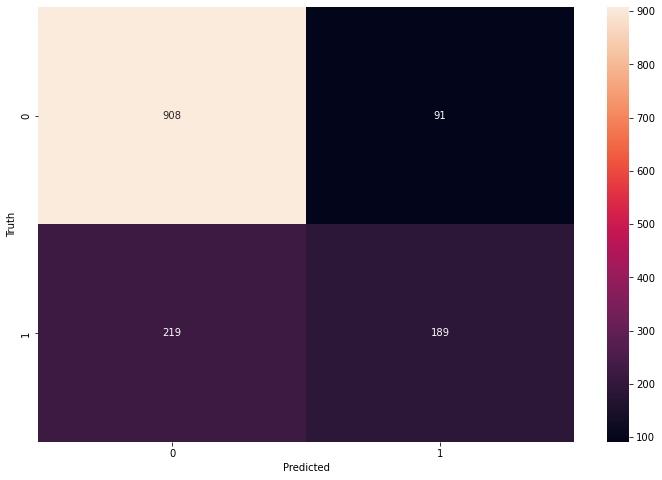

In [145]:
# PLOT CONFUSION METRIX
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (12,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       999
           1       0.68      0.46      0.55       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



**We observe a significant difference between f1-score of 1 and 0, that happening because the dataset is imbalanced**

In [147]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

**Dataset Balancing Approaches**<br><br>
**------------------------------------------------------**<br>
**Method 1: Undersampling<br><br>**
**Method2: Oversampling<br>**
**------------------------------------------------------**

In [148]:
# First we divide our sample according to our classes, we will need these in all methods.
# Class count
count_class_0, count_class_1 = new_df.Churn.value_counts()
print(f"The number how many times we have 0 is {count_class_0}\nand the number for 1 is {count_class_1}\n")

# Divide by class
df_class_0 = new_df[new_df['Churn'] == 0]
df_class_1 = new_df[new_df['Churn'] == 1]
print('This we can show and with order .shape: ',{df_class_0.shape, df_class_1.shape},
       'but we keep it in variables because we need that numbers to all methods.')

The number how many times we have 0 is 5163
and the number for 1 is 1869

This we can show and with order .shape:  {(1869, 27), (5163, 27)} but we keep it in variables because we need that numbers to all methods.


**Method 1: Undersampling.<br>**
**It is not a very good method because we lose a lot of information.**

In [149]:
# Undersample the class_0 and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1) # We reduce the number of samples of the class by 0, so that we have equal samples in class 0 and 1.
df_underSampling = pd.concat([df_class_0_under, df_class_1], axis=0)

print(f'Random under-sampling:\n{df_underSampling.Churn.value_counts()}')

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [150]:
df_underSampling.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2926,1,0,1,0,0.957746,1,1,1,1,1,1,1,1,1,0.972637,0.942078,0,0,1,0,0,0,1,0,0,1,0
217,0,0,1,0,0.915493,0,0,1,1,1,1,1,0,1,0.381592,0.435080,0,1,0,0,0,0,1,1,0,0,0
6519,0,0,1,1,0.873239,1,1,0,1,0,0,0,1,1,0.727363,0.663039,0,0,1,0,0,1,0,0,0,1,0


In [151]:
# Train and Test Split
X = df_underSampling.drop('Churn',axis='columns')
y = df_underSampling['Churn']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) #stratify is to ensure we have a balanced dataset
y_train_under.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [152]:
Y_preds = ANN(X_train_under, y_train_under, X_test_under, y_test_under, 'binary_crossentropy')

Epoch 1/100
75/75 [==============================] - 2s 8ms/step - loss: 0.6220 - accuracy: 0.6555 - val_loss: 0.4987 - val_accuracy: 0.7793
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.7341 - val_loss: 0.4678 - val_accuracy: 0.7843
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7437 - val_loss: 0.4637 - val_accuracy: 0.7742
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7529 - val_loss: 0.4651 - val_accuracy: 0.7759
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.7542 - val_loss: 0.4653 - val_accuracy: 0.7759
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7529 - val_loss: 0.4613 - val_accuracy: 0.7776
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.5040 - accuracy: 0.7529 - val_loss: 0.4636 - val_accuracy: 0.7793
Epoch 8/100
7

In [153]:
y_pred_underSampling = binary_prediction_comparison(Y_preds, y_test_under)

The first 10 predictions of the model are: [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

The real first 10 churn status is:
 5585    1
1568    0
3204    0
1001    1
115     0
2154    0
2112    0
4089    1
6508    1
2188    0
Name: Churn, dtype: int64


**Method2: Oversampling**

In [154]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_overSampling = pd.concat([df_class_0, df_class_1_over], axis=0)

print(f'Random under-sampling:\n{df_overSampling.Churn.value_counts()}')

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [164]:
# Train and Test Split
X = df_overSampling.drop('Churn',axis='columns')
y = df_overSampling['Churn']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train_over.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [156]:
Y_preds = ANN(X_train_over, y_train_over, X_test_over, y_test_over, 'binary_crossentropy')

Epoch 1/100
207/207 [==============================] - 2s 5ms/step - loss: 0.5461 - accuracy: 0.7279 - val_loss: 0.5016 - val_accuracy: 0.7494
Epoch 2/100
207/207 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.7604 - val_loss: 0.4899 - val_accuracy: 0.7494
Epoch 3/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4982 - accuracy: 0.7610 - val_loss: 0.4867 - val_accuracy: 0.7524
Epoch 4/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4887 - accuracy: 0.7673 - val_loss: 0.4811 - val_accuracy: 0.7524
Epoch 5/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4853 - accuracy: 0.7639 - val_loss: 0.4807 - val_accuracy: 0.7554
Epoch 6/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.7659 - val_loss: 0.4776 - val_accuracy: 0.7554
Epoch 7/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.7741 - val_loss: 0.4770 - val_accuracy: 0.7536

In [157]:
y_pred_overSampling = binary_prediction_comparison(Y_preds, y_test_over)

The first 10 predictions of the model are: [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]

The real first 10 churn status is:
 4898    1
4731    0
2033    1
2053    1
5034    0
3957    0
453     1
2998    0
1458    1
1268    1
Name: Churn, dtype: int64


**Compare UnderSampling and OverSampling Datasets**

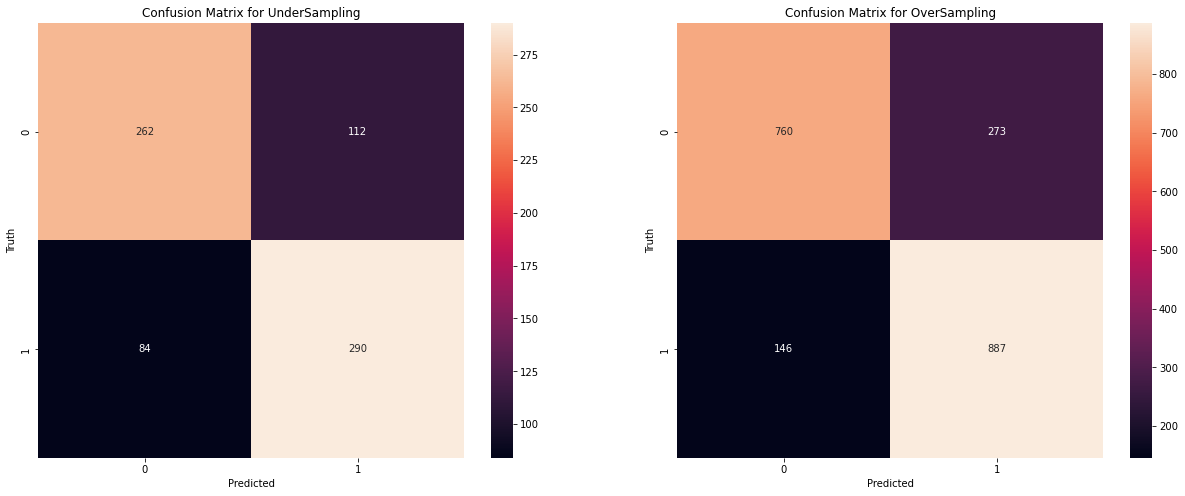

In [160]:
# PLOT CONFUSION MATRIX 1
cm1 = tf.math.confusion_matrix(labels=y_test_under, predictions=y_pred_underSampling)

# PLOT CONFUSION MATRIX 2
cm2 = tf.math.confusion_matrix(labels=y_test_over, predictions=y_pred_overSampling)

fig, axs = plt.subplots(1, 2, figsize=(21, 8))

# Plot Confusion Matrix for UnderSampling dataset
axs[0].set_title('Confusion Matrix for UnderSampling')
sn.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')

# Plot Confusion Matrix for OverSampling dataset
axs[1].set_title('Confusion Matrix for OverSampling')
sn.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')

# Display the plot
plt.show()

In [173]:
print("Classification Report for the UnderSampling Dataset: \n\n",classification_report(y_test_under,y_pred_underSampling))
print("\n\n\nClassification Report for the OverSampling Dataset: \n\n",classification_report(y_test_over,y_pred_overSampling))

Classification Report for the UnderSampling Dataset: 

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       374
           1       0.72      0.78      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748




Classification Report for the OverSampling Dataset: 

               precision    recall  f1-score   support

           0       0.84      0.74      0.78      1033
           1       0.76      0.86      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



**We observe that the OverSampling technique yields better results compared to UnderSampling when applied to the same Artificial Neural Network (ANN). This conclusion is supported by analyzing the F1-score, which indicates the overall performance of the classification model. Specifically, when considering the two classes in the dataset, it is evident that the OverSampling approach demonstrates a higher F1-score percentage, indicating better predictive accuracy and a more balanced representation of the data.**